In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import erfinv
from sklearn.preprocessing import QuantileTransformer

np.random.seed(42)

# Github code
+ https://github.com/affjljoo3581/Job-Recommend-Competition

In [2]:
# 데이터 생성
X = (np.random.randn(200, 1) * 5 + 10) ** 2
df = pd.DataFrame(X)
df.head()

,0
0,155.839539
1,86.651495
2,175.256365
3,310.293484
4,77.955358


In [3]:
epsilon = 1e-4
noise_scale = 0.001

gaussian_noise = np.random.normal(0, 1, df[df.columns[0]].shape)
transformed_data = df[df.columns[0]] + noise_scale * df[df.columns[0]].max() * gaussian_noise

data_rank = np.argsort(np.argsort(transformed_data))
data_rank = 2 * data_rank / data_rank.max() - 1

clipped_data_rank = np.clip(data_rank, -1 + epsilon, 1 - epsilon)
# 오차역함수 적용
transformed_data = erfinv(clipped_data_rank)

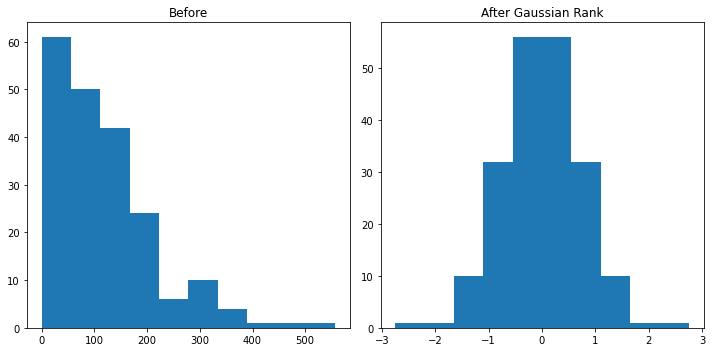

In [4]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df.columns[0]])
plt.title('Before')

plt.subplot(1, 2, 2)
plt.hist(transformed_data)
plt.title('After Gaussian Rank')

plt.tight_layout()
plt.show()

# Kaggle Code
+ numpy implementation
+ https://www.kaggle.com/tottenham/10-fold-simple-dnn-with-rank-gauss

In [5]:
def rank_gauss(x):
    N = x.shape[0]
    temp = x.argsort()
    
    rank_x = temp.argsort() / N
    rank_x -= rank_x.mean()
    rank_x *= 2
    
    efi_x = erfinv(rank_x)
    efi_x -= efi_x.mean()
    return efi_x

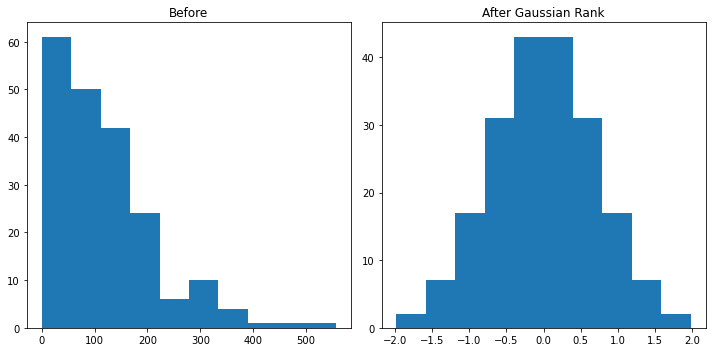

In [6]:
transformed_data = rank_gauss(df[df.columns[0]])

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df.columns[0]])
plt.title('Before')

plt.subplot(1, 2, 2)
plt.hist(transformed_data)
plt.title('After Gaussian Rank')

plt.tight_layout()
plt.show()

# Kaggle Code
+ sklearn QuantileTransformer
+ https://www.kaggle.com/kushal1506/moa-pytorch-0-01859-rankgauss-pca-nn

In [7]:
transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
transformer.fit(X)

transformed_data = transformer.transform(X)

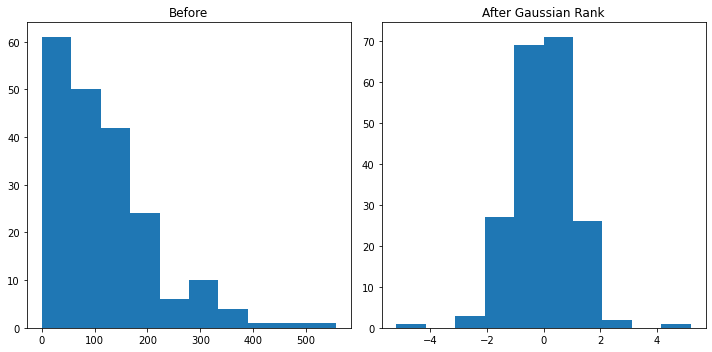

In [8]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df.columns[0]])
plt.title('Before')

plt.subplot(1, 2, 2)
plt.hist(transformed_data)
plt.title('After Gaussian Rank')

plt.tight_layout()
plt.show()